In [1]:
# imports for using the notebook

import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import genfromtxt
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, FeatureAgglomeration
from sklearn.decomposition import PCA
import seaborn as sns
import networkx as nx

In [2]:
# Specifying datasets from different reddit pages

df_gaming = pd.read_csv('../data/scrapes/gaming.csv')
df_satis = pd.read_csv('../data/scrapes/SatisfactoryGame.csv')
df_marauders = pd.read_csv('../data/scrapes/MaraudersGame.csv')
df_tarkov = pd.read_csv('../data/scrapes/EscapefromTarkov.csv')
df_politics = pd.read_csv('../data/28feb/scrapes/politics.csv')


# Datasets post cleaning the text
# df_politics['cleaned_text'] = prep_pipeline(df_politics, 'comment_text')
# df_politics['short'] = shorten_sens(df_politics['cleaned_text'], 50)

# Function to speed up the process: 

def shorten_and_clean_dataset (comment_csv, comment_column : str, desired_comment_length : int):
    dataframe = pd.read_csv(comment_csv)
    dataframe['cleaned_text'] = prep_pipeline(dataframe, comment_column)
    dataframe['short'] = shorten_sens(dataframe['cleaned_text'], desired_comment_length)
    return dataframe

In [3]:
#save_embeddings_as_npy('../data/embeddings/politics_embeddings.npy', '../data/scrapes/politics.csv', 'comment_text', 50)

In [4]:
# LOADING EMBEDDINGS FROM FILES

politics_embeddings_big = np.load('../data/big_embeddings/politics.npy')
politics_embeddings = np.load('../data/embeddings/politics_embeddings.npy')

# gaming_embeddings = np.load('../data/embeddings/gaming_embeddings.npy')
# marauders_embeddings = np.load('../data/embeddings/marauders_embeddings.npy')
# tarkov_embeddings = np.load('../data/embeddings/tarkov_embeddings.npy')

# include below when the satisfactory embeddings are done
# satisfactory_embeddings = np.load('../data/embeddings/satisfactory_embeddings.npy')

In [5]:
politics_user_embeddings = pair_users_embeddings(df_politics, politics_embeddings, True)

In [6]:
print(len(politics_user_embeddings))
print(len(politics_embeddings_big))
pol_emb_big_pair = pair_users_embeddings(df_politics, politics_embeddings_big, False)

10022
10384


In [7]:
df_politics.columns

Index(['post_title', 'post_text', 'post_id', 'post_score',
       'post_total_comments', 'post_url', 'comment_author', 'comment_text',
       'post_author'],
      dtype='object')

In [15]:
def do_post_titles(df):

    texts, authors, post_ids = [], [], []
    title_author_set = set(zip(df['post_title'], df['post_author'], df['post_id'])) 

    for text, author, post_id in  title_author_set:
        texts.append(text)
        authors.append(author)
        post_ids.append(post_id)
    
    title_embeddings = embed_comments(texts)
    return pd.DataFrame(data=[post_ids, authors, texts, title_embeddings]).T.rename(columns={0 : 'post_id', 1: 'post_author', 2: 'post_title', 3: 'embeddings'})
politics_data = do_post_titles(df_politics)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [16]:
politics_data

,post_id,post_author,post_title,embeddings
0,11h3kwn,Picture-unrelated,The Far-Right's Culture Wars Are Just a Distra...,"[-0.37536162, 0.40405983, 0.5421141, 0.1917139..."
1,119b99o,dude_x,Florida college students planning statewide wa...,"[0.00625864, 0.21496424, 1.4413918, 0.06535537..."
2,119wu1b,newnemo,Sen. Sheldon Whitehouse demands more transpare...,"[-0.17598835, 0.97953796, 0.48982826, 0.436783..."
3,112dh8s,e-r_bridge,"Democratic Sen. Dianne Feinstein to retire, op...","[-0.21221326, 0.11249478, 0.5308911, 0.0608474..."
4,11j096k,LudovicoSpecs,Calls to boycott Walgreens grow as pharmacy co...,"[0.14446947, 0.4059212, 0.13047688, -0.1966622..."
...,...,...,...,...
95,11cx7fp,Sharp_Literature_739,Most Americans Think House Republicans Aren’t ...,"[-0.15417686, 0.7072766, -0.44959825, -0.03968..."
96,11bkudw,CordAlex1996,State lawmaker vows to filibuster all bills un...,"[-0.3657749, 0.1461179, 0.79447937, 0.1144837,..."
97,118a6w8,TalcMine,Biden EPA to take over cleanup of toxic Ohio d...,"[-0.17619674, 0.69390506, 0.35494787, 0.145533..."
98,10wuxdo,mdj1359,"Dark Brandon shows up at State of the Union, m...","[-0.08714572, 0.9927409, -0.07985403, 0.439079..."


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


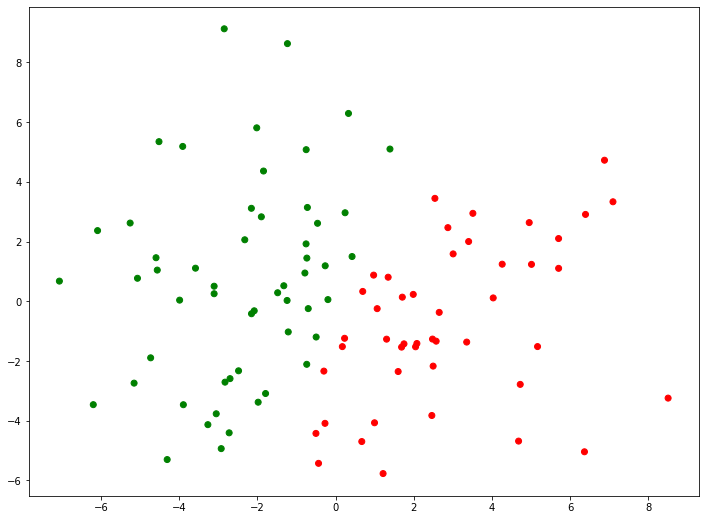

In [21]:
plt.figure(1, figsize=(12,9))

reduce_dims_and_kmeans(dict(politics_data['embeddings']), 2)


In [ ]:
based_dict = {}
for i, j in zip(users,politics_embeddings_big):
    based_dict[i] = j

NameError: name 'users' is not defined

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


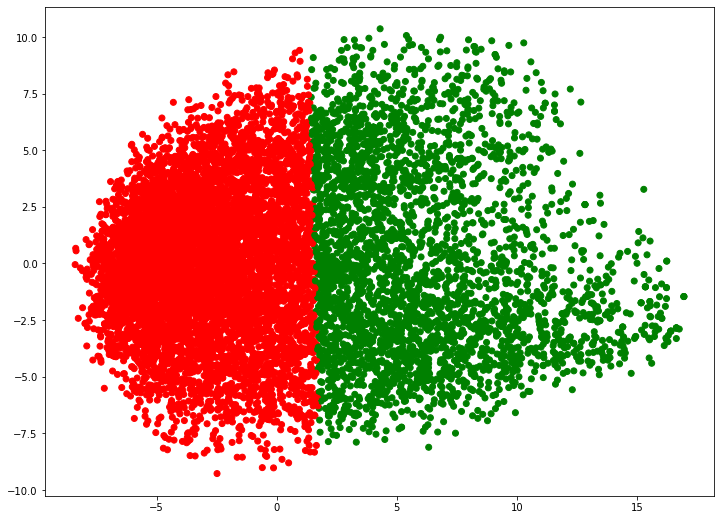

In [ ]:
plt.figure(2, figsize=(12,9))

reduce_dims_and_kmeans(based_dict, 2)

In [ ]:
authors = []
posts = []
users = []

for i, j in zip(df_politics['comment_author'], df_politics['post_id']):
    authors.append(i)
    posts.append(j)
    if i not in users:
        users.append(i)

In [ ]:
Squeem = reduce_to_one_dimension_kmeans(dict(zip(users, politics_embeddings_big)))
x_axis = []
for name,emb in zip(Squeem[0], Squeem[1]):
    x_axis.append([str(name),emb])

def sortie(beb):
    return beb[0]
x_axis = sorted(x_axis, key=sortie)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(len(Squeem[1]))
sum(Squeem[1])

10384


3318

In [ ]:
# Test for making new dataframe with columns: 
# should be exportable to networkx - preferably edgelist
# Author (node_id),pca_x-axis , post_id

# authors = []
# x_axis = []
# posts = []

# df_politics = df_politics.drop('post_text', axis=1).dropna()

In [ ]:
# df_politics = df_politics.sort_values(by='comment_author')
# for ball in df_politics.iloc:
#     ID, Author = ball[2], ball[6]
#     authors.append(Author)
#     posts.append(ID)

In [ ]:
edge_list = []
for i, j in zip(authors, posts):
    edge_list.append((i,j))

class_dict={}
for i, j in zip(Squeem[0], Squeem[1]):
    class_dict[i] = j

posts_dict = {}
for i in posts:
    posts_dict[i] = 'white'

In [ ]:
n1 = nx.from_edgelist(edgelist=edge_list)
nx.set_node_attributes(n1, class_dict, 'classes')
nx.set_node_attributes(n1, posts_dict, 'classes')
# color_map = {0: 'Green', 1 : 'Red', 2: 'Yellow'}

classes = nx.get_node_attributes(n1, 'classes')
for i in classes:
    if classes[i] == 0:
        classes[i] = 'red'
    if classes[i] == 1:
        classes[i] = 'green'

In [ ]:
colors = [classes.get(node) for node in n1.nodes()]

In [ ]:
#plt.figure(1, figsize= (12, 12), dpi=200)
#nx.draw(n1,node_size = 50, font_size=8, node_color = colors)

In [ ]:
nx.is_connected(n1)

True

In [ ]:
nx.average_shortest_path_length(n1)

3.9429851051882006